## Описание проекта 
</font><font color='Blue'><b>Составить прогноз прибыльности игр на 2017 год. 
    У нас есть информация по продажам игр за предыдущие года, платформы, жанры, реутинг по Европе и Северной Америке и Японии.</b></font><br>
    Действия: 1. подготовка данных:   
    •	Заменить названия столбцов   
    •	Преобразовать данные в нужные типы   
    •	Обработать пропуски при необходимости   
    •	Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.    
    2. Исследовательский анализ:   
    •	Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?   
    •	Как менялись продажи по платформам. Платформы с наибольшими суммарными продажами (распределение по годам). За какой характерный срок появляются новые и исчезают старые платформы?   
    •	Выделить актуальный период для исследования   
    •	Какие платформы лидируют по продажам, растут или падают    
    •	Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.     
    •	Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Диаграмма рассеяния,  корреляция   
    •	Соотнесьти выводы с продажами игр на других платформах.   
    •	Изучить общее распределение игр по жанрам.   
    3. Определить для пользователя каждого региона (NA, EU, JP):   
    •	Самые популярные платформы (топ-5).   
    •	Самые популярные жанры (топ-5).   
    •	Влияет ли рейтинг ESRB на продажи в отдельном регионе?  
    4. Проверить гипотезы  
    •	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
    •	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
    5.Общий вывод  
    



    

## Подготовка данных 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.express as px

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Приведем названия столбцов к нижнему регистру  

In [3]:
df.columns = map(str.lower, df.columns)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменим тип данных в столбце с указанием года, на целочисленный формат и оценки пользователей, потому что там числовые значения, а не строковые  

In [5]:
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [7]:
df.duplicated().sum()

0

Дубликаты не обнаружены  

In [8]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [9]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Пропуски не обнаружены

In [10]:
df['year_of_release'].unique()


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [11]:
df = df.dropna(subset = ['year_of_release', 'genre', 'name'])

In [12]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Заполнила пропуски в графе пользовательские рейтинги средним значение  

In [14]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [15]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Заполнила пропуски в графе отзывы критиков средним значение   

In [17]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [18]:
df['rating'] = df['rating'].fillna(value = 'без рейтинга')

Заполнила пропущенные значения в графе рейтинг значением 'без рейтинга'

In [19]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,без рейтинга
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,без рейтинга
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,без рейтинга
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,без рейтинга


In [20]:
df['all_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Добавили столбец с общим числом всех продаж

In [21]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,без рейтинга,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,без рейтинга,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,без рейтинга,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,без рейтинга,28.31



<font color='DarkBlue'><b>Пропуски в графе год были удалены ввиду их незначительного количества  
Пропуски в оценках оставляем, они нам не мешают  
Пропуски в графе рейтинг заполняем заглушкой  ‘без рейтинга’  
Причины в пропусках данных:   
Год выхода – то скорее всего ошибка в данных, что касается оценок, то скорее всего пропуски говорят о том ,что данные по оценкам не известны    
</b>

In [22]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-

## Исследовательский анализ данных  

### Анализ количества игр по годам  

<AxesSubplot:xlabel='year_of_release'>

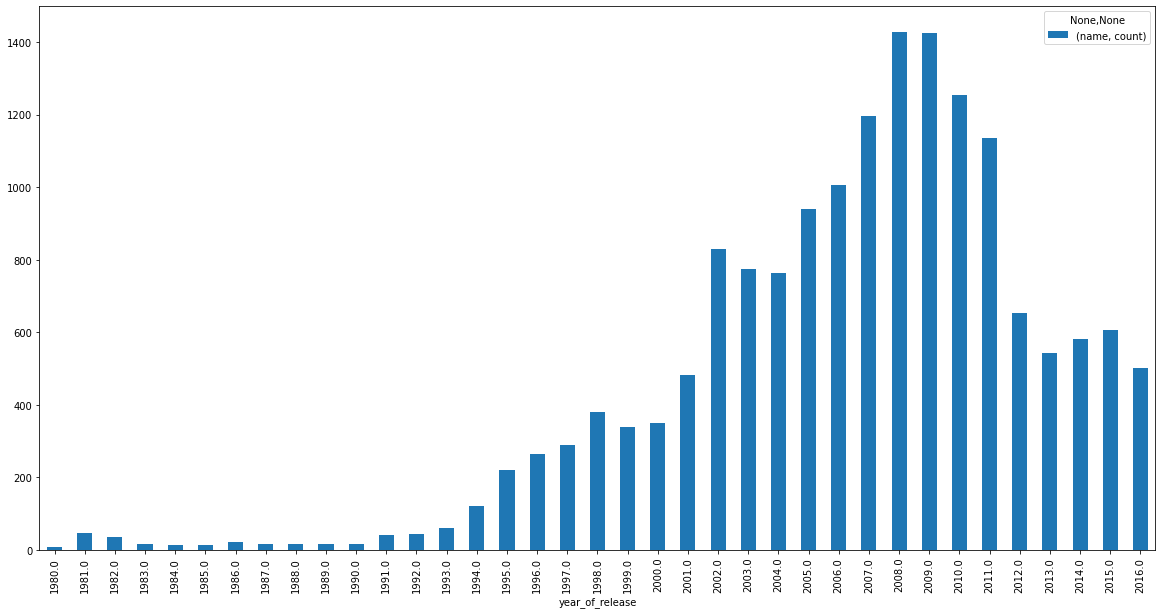

In [23]:
df_years = df.groupby('year_of_release').agg({'name' : ['count']})
df_years.plot(kind = 'bar', figsize=(20, 10))
        

Данные за все периоды не важны, потому как опираться стоит на динамику и данные за последние годы

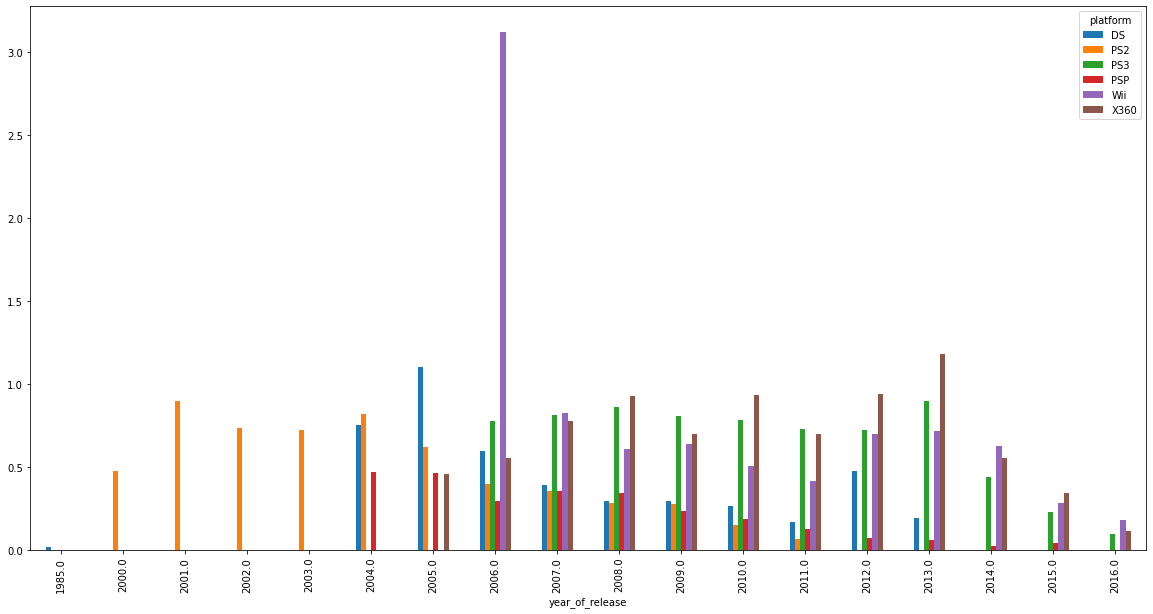

In [24]:
top_platform = df['platform'].value_counts().sort_values(ascending=False).head(6)
df_top_locality_pivot = (df
    .query('platform in @top_platform.index')
    .pivot_table(index='year_of_release', columns = 'platform', values='all_sales')
    .plot(kind = 'bar', figsize=(20, 10))
         )


Платформа PS2 была монополистом и с приходом других платформ, продаже стали падать  
Платформа DS появилась в 2004 году, в 2005 пик продаж, затем на убыль   
Практически тоже самое с платформой PSP, только продажи суммарные меньше  
Платформа X360 наблюдалась динамика роста до 2013 года(пик продаж), затем снижение продаж   
Платформа PS3 с 2006 пло 2013 весьма стабильна, а потом снижение продаж   
Платформа Wii очень высокий уровень продаж в 2006 году, затем резкий спад, но суммарные продаже достаточно высокий по годам   
10 лет период жизни платформы  

### Выбираем актуальный период   

In [25]:
df_new = df.query('year_of_release > 2011')


Я использую данные с 2011 года, потому как до этого количество игр было намного меньше  

### Какие платформы лидируют по продажам, растут или падают? 

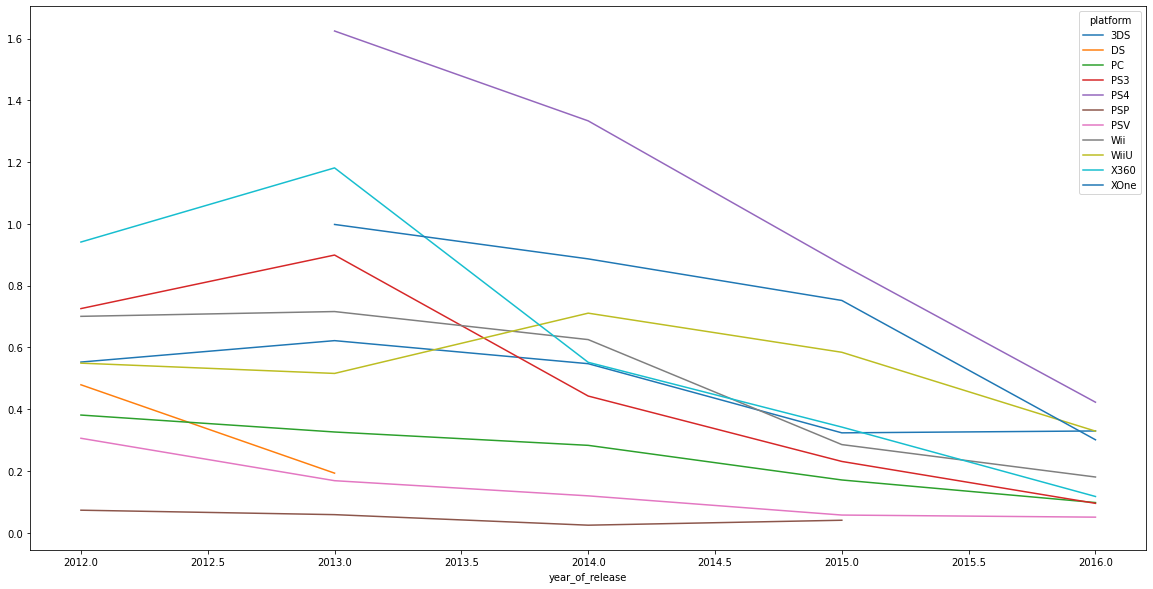

In [26]:
df_top = ( df_new.pivot_table(index='year_of_release', columns = 'platform', values='all_sales')
    .plot(figsize=(20, 10))
)

PS4 3DS WiiU XOne лидеры по продажам, при этом выросла по продажам только последняя платформа, остальные падают  
Потенциально прибыльные: XOne, WiiU, PS4 



### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 3.0)

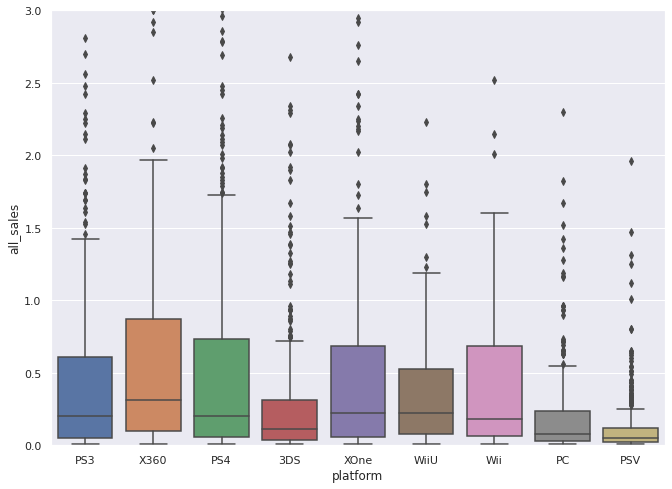

In [27]:
pl_l = ['PS4','PS3','X360','3DS','XOne', 'WiiU', 'PC', 'PSV', 'Wii']
 
df_box=df_new.query('platform in @pl_l')

sns.set(rc={'figure.figsize':(11,8)})

sns.boxplot(data = df_box, x='platform', y='all_sales')
plt.ylim([0, 3])


pl_l = ['PS4','PS3','X360','3DS','XOne', 'WiiU', 'PC', 'PSV', 'Wii']
 
df_box=df_boxplot.query('platform in @pl_l')

sns.set(rc={'figure.figsize':(11,8)})

sns.boxplot(data = df_box, x='platform', y='all_sales')


Средние продажи выше всего у платформы X360  
Средние продажи ниже всего у платформы PSV    
Средние значения продаж  PS4, PS3, XOne, WiiU, Wii  примерно одинаковы    

### Связь между отзывами и продажами. На примере разных платформ.   

In [29]:
import warnings
warnings.filterwarnings("ignore")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

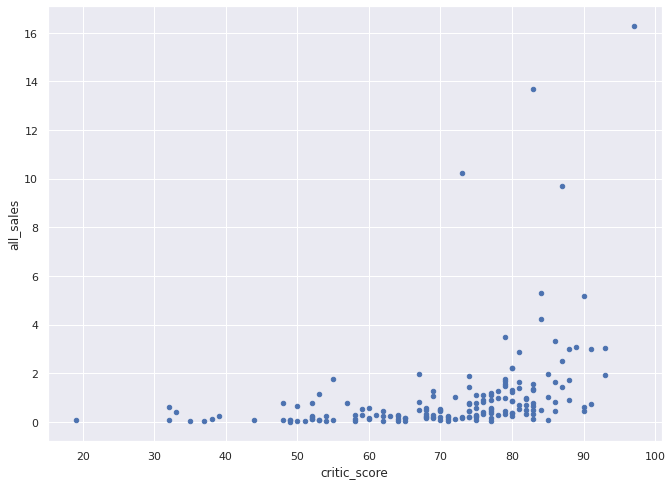

In [30]:
df_new[df_new['platform'] == 'X360'].plot( x = 'critic_score', y = 'all_sales', kind = 'scatter')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

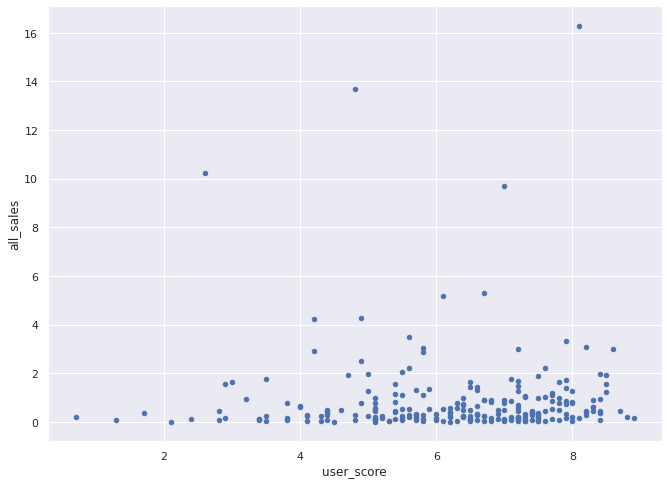

In [31]:
df_new[df_new['platform'] == 'X360'].plot( x = 'user_score', y = 'all_sales', kind = 'scatter')


In [32]:
df_new[df_new['platform'] == 'X360'][['critic_score', 'all_sales']].corr()

,critic_score,all_sales
critic_score,1.000000,0.360573
all_sales,0.360573,1.000000


Зависимость есть. но не сильная   

In [33]:
df_new[df_new['platform'] == 'X360'][['user_score', 'all_sales']].corr()

,user_score,all_sales
user_score,1.000000,0.006164
all_sales,0.006164,1.000000


Зависимости продаж от отзывов пользователей нет  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

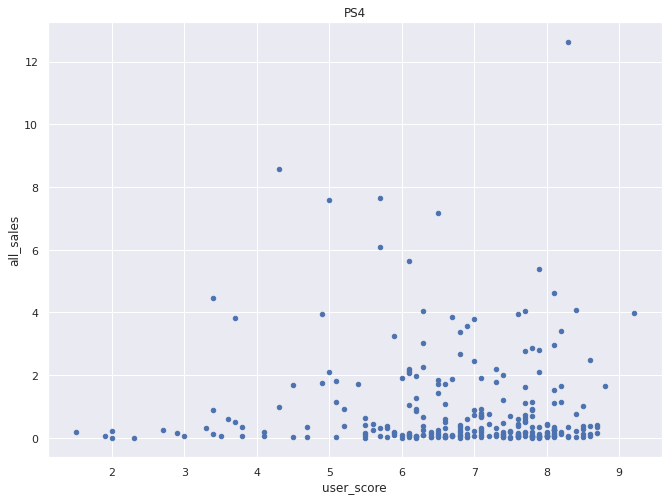

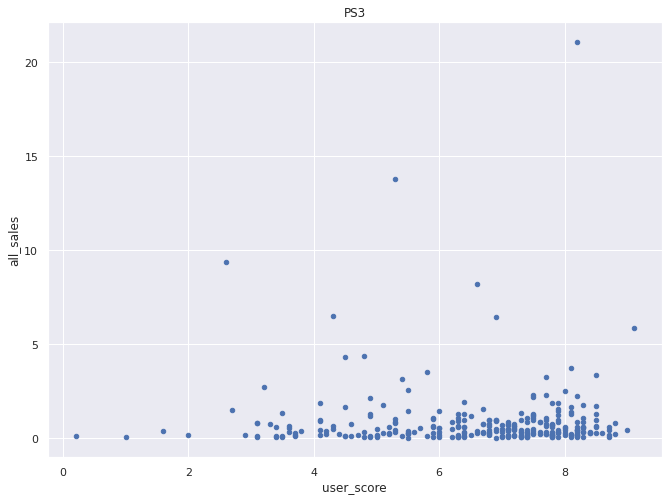

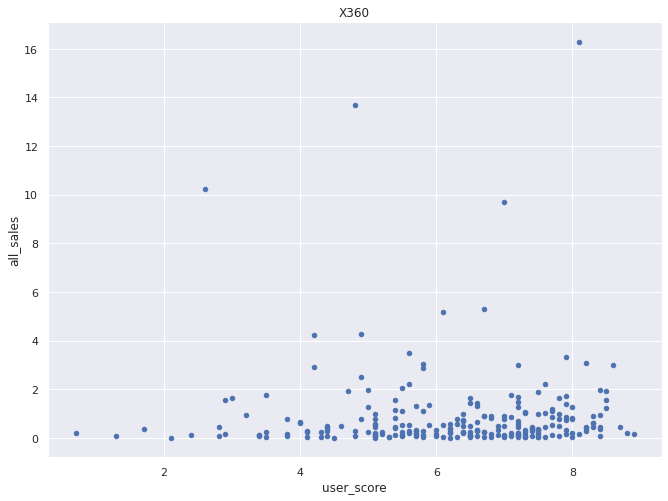

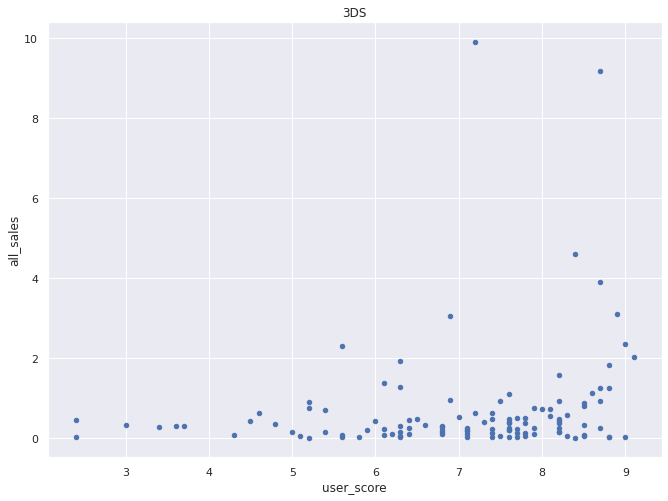

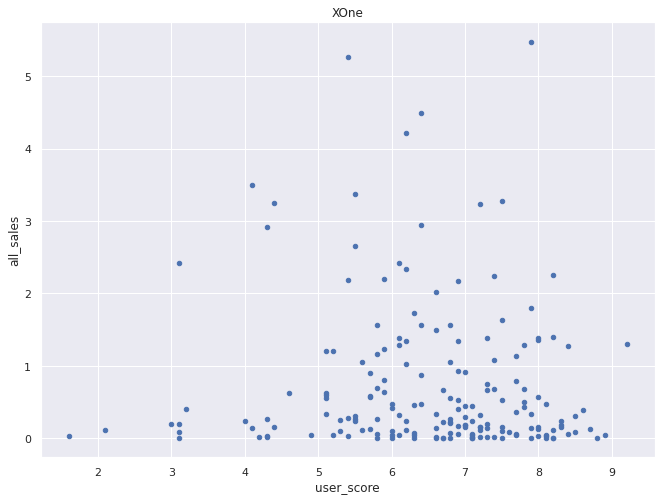

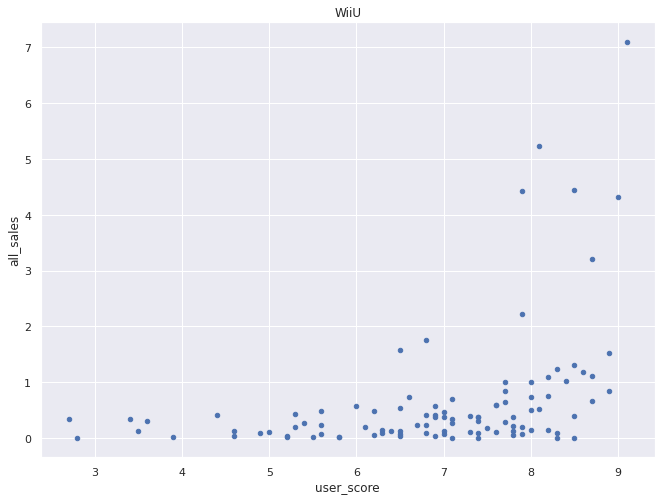

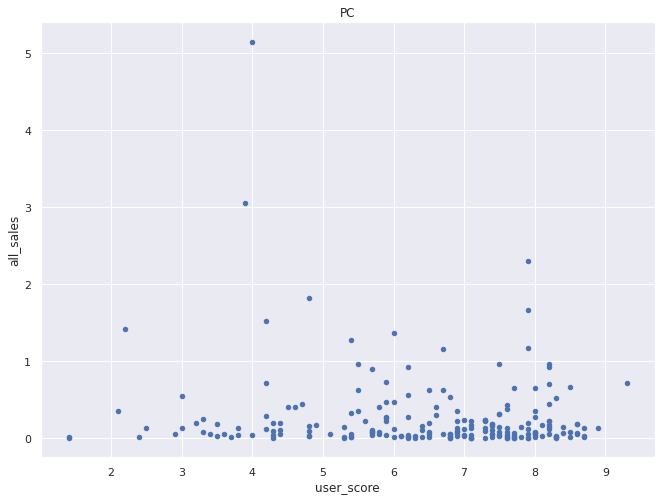

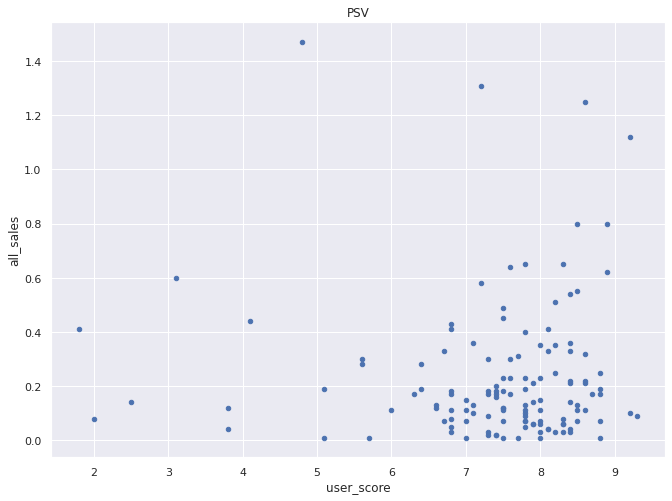

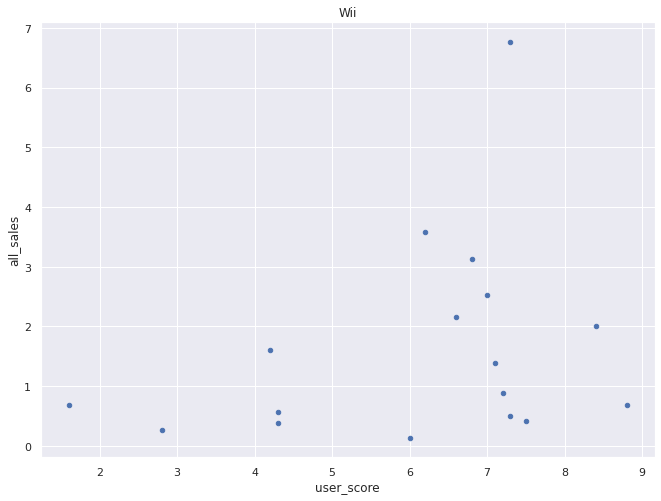

In [34]:
pl_l = ['PS4','PS3','X360','3DS','XOne', 'WiiU', 'PC', 'PSV', 'Wii']
for platform in pl_l:
    df_new.query('platform in @platform').plot(x='user_score', y ='all_sales', kind = 'scatter', title = platform)
  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

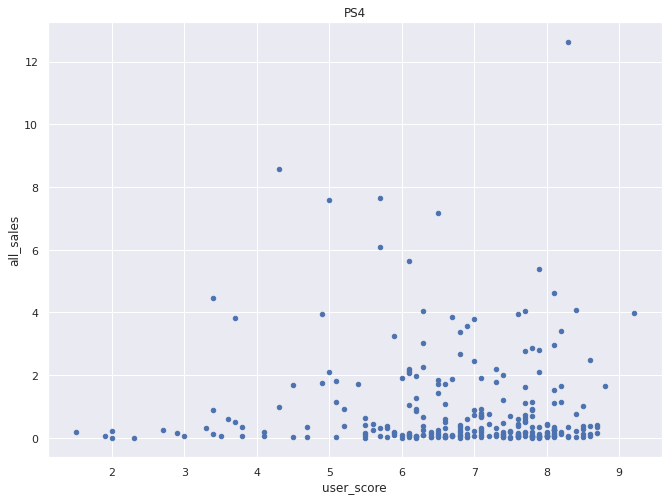

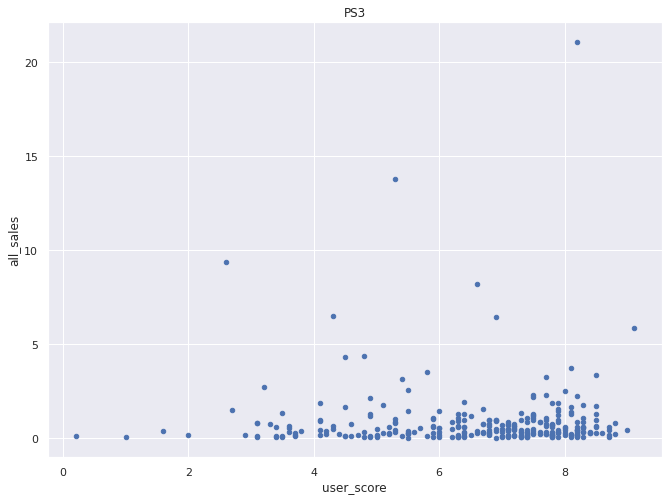

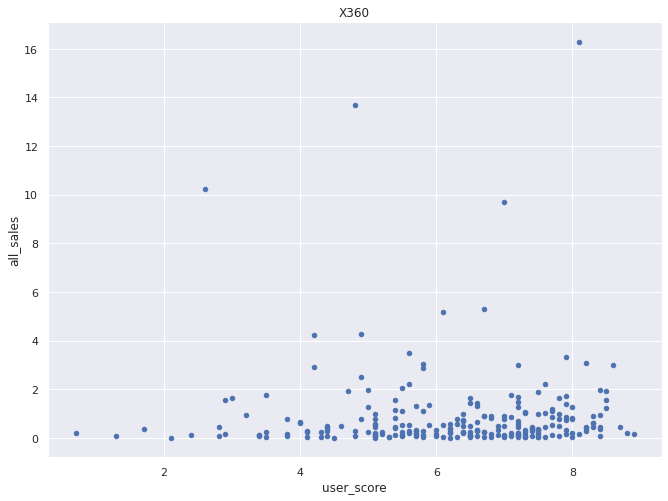

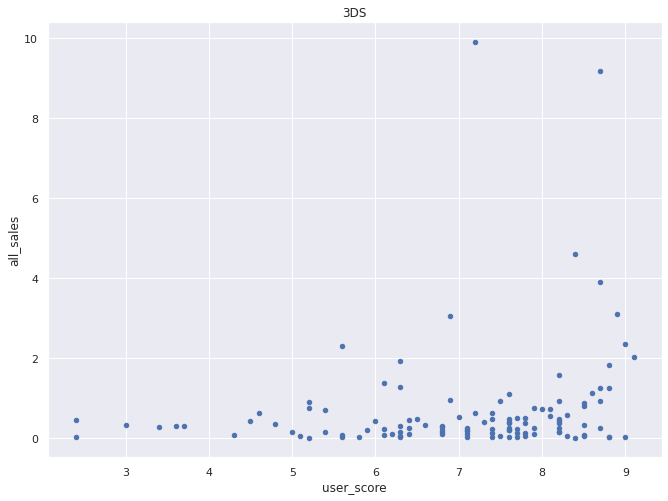

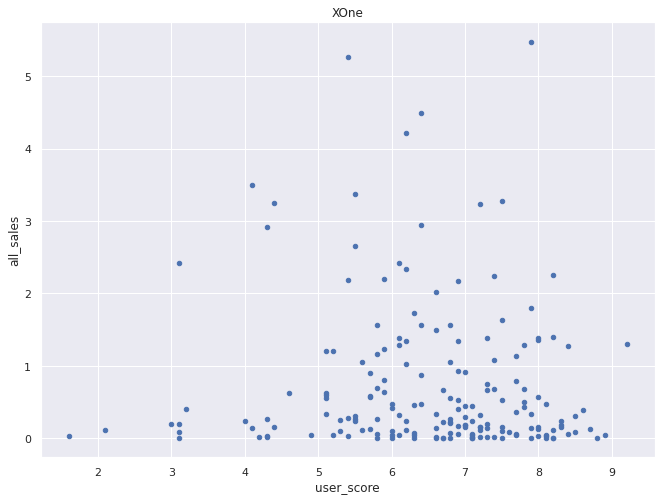

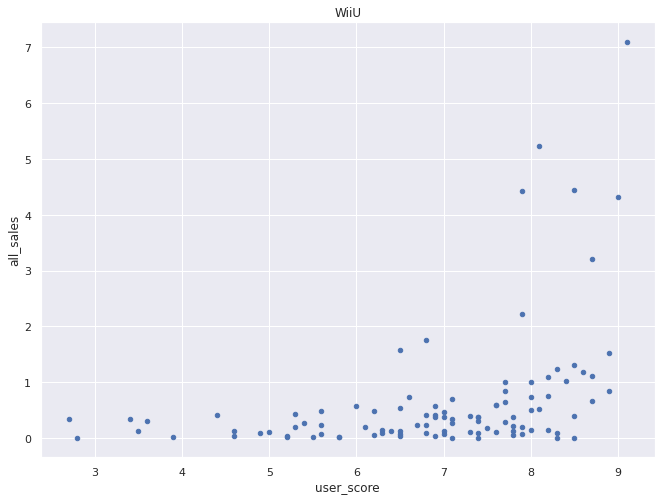

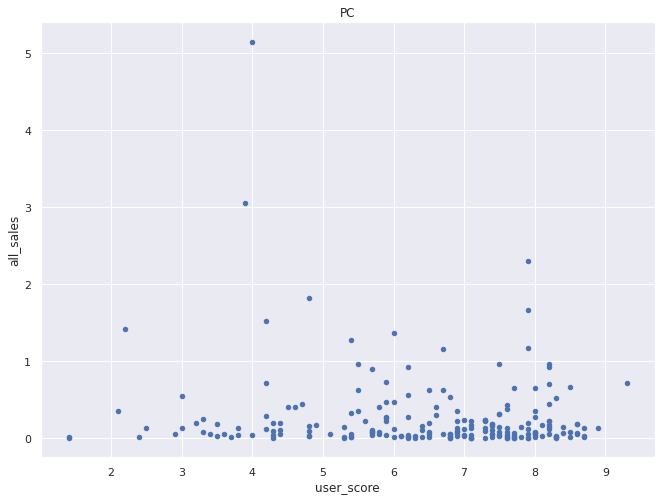

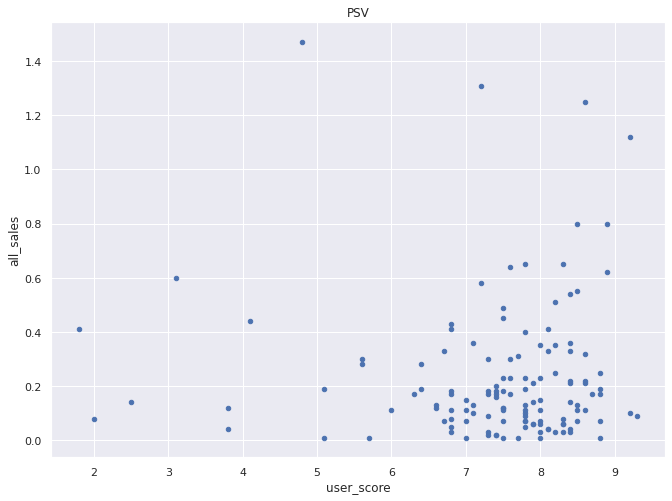

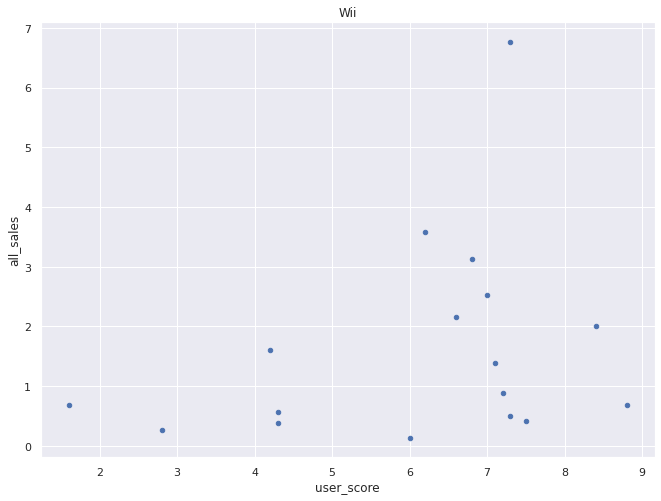

In [35]:
pl_l = ['PS4','PS3','X360','3DS','XOne', 'WiiU', 'PC', 'PSV', 'Wii']
for platform in pl_l:
   df_new.query('platform == @platform').plot(x='user_score', y ='all_sales', kind = 'scatter', title = platform)
   
  

In [36]:
for platform in pl_l:
    display(df_new.query('platform == @platform')[['all_sales', 'critic_score', 'user_score']].corr())

,all_sales,critic_score,user_score
all_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


,all_sales,critic_score,user_score
all_sales,1.000000,0.331497,-0.005144
critic_score,0.331497,1.000000,0.539456
user_score,-0.005144,0.539456,1.000000


,all_sales,critic_score,user_score
all_sales,1.000000,0.360573,0.006164
critic_score,0.360573,1.000000,0.557352
user_score,0.006164,0.557352,1.000000


,all_sales,critic_score,user_score
all_sales,1.000000,0.320803,0.197583
critic_score,0.320803,1.000000,0.722762
user_score,0.197583,0.722762,1.000000


,all_sales,critic_score,user_score
all_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


,all_sales,critic_score,user_score
all_sales,1.000000,0.34838,0.400219
critic_score,0.348380,1.00000,0.770080
user_score,0.400219,0.77008,1.000000


,all_sales,critic_score,user_score
all_sales,1.000000,0.237243,-0.121867
critic_score,0.237243,1.000000,0.432587
user_score,-0.121867,0.432587,1.000000


,all_sales,critic_score,user_score
all_sales,1.000000,0.094488,-0.004339
critic_score,0.094488,1.000000,0.699199
user_score,-0.004339,0.699199,1.000000


,all_sales,critic_score,user_score
all_sales,1.000000,-0.424341,0.296197
critic_score,-0.424341,1.000000,0.816295
user_score,0.296197,0.816295,1.000000


pl_l = ['PS4','PS3','X360','3DS','XOne', 'WiiU', 'PC', 'PSV', 'Wii']  
PS4 от отзывов критиков зависимость есть, от отзывов пользователей зависимости нет   
PS3 от отзывов критиков зависимость есть, от отзывов пользователей зависимости нет    
X360 от отзывов критиков зависимость есть, от отзывов пользователей зависимости нет    
3DS от отзывов критиков зависимость есть и от  отзывов пользователей зависимость есть   
XOne от отзывов критиков зависимость есть, от отзывов пользователей зависимости нет    
WiiU от отзывов критиков зависимость есть, от отзывов пользователей зависимости есть, причем выше, чем от отзывов критиков   
PC от отзывов критиков зависимость есть, от отзывов пользователей зависимость есть и она отрицательная    
PSV от отзывов критиков зависимость крайне мала, от отзывов пользователей зависимости нет    
Wii от отзывов критиков зависимость есть и она отрицательна, от отзывов пользователей зависимость есть    


<b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Изменила вывод  </b></font

В зависмости от платформы мы наблюдаем разность зависимость продаж от отзывов пользователей или критиков или полное ее отсутсвие  

### Влияние жанра на прибыльность   

In [37]:
df_box_genre = df_new.groupby('genre')['all_sales'].mean().round(2)
print(df_box_genre)

genre
Action          0.43
Adventure       0.10
Fighting        0.41
Misc            0.44
Platform        0.72
Puzzle          0.17
Racing          0.47
Role-Playing    0.52
Shooter         1.30
Simulation      0.44
Sports          0.68
Strategy        0.19
Name: all_sales, dtype: float64


(0.0, 3.0)

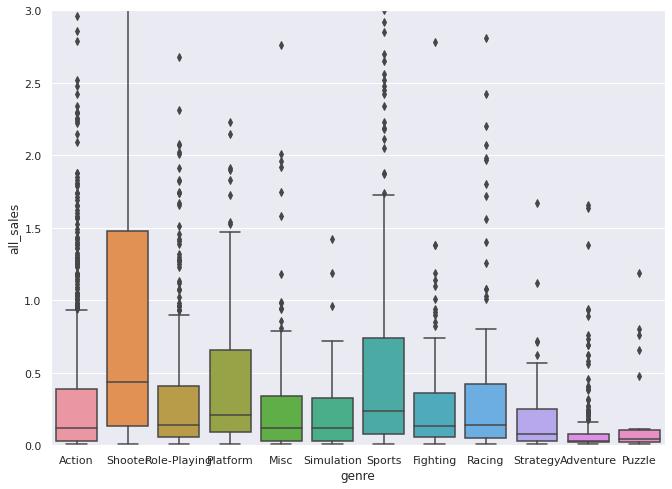

In [38]:
sns.set(rc={'figure.figsize':(11,8)})

sns.boxplot(data = df_new, x='genre', y='all_sales')
plt.ylim([0, 3])



<font color='DarkBlue'><b>Shooter наиболее прибыльный жанр, adventure самый низкий </b>

## Портрет пользователя каждого региона   

### Самые популярные платформы (топ-5)

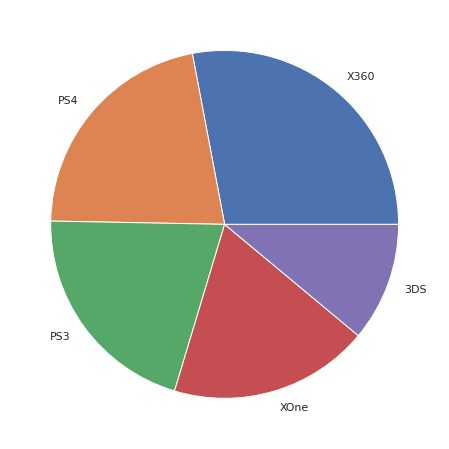

In [39]:
top_platform_na = (df_new.groupby('platform')['na_sales'].sum().
             reset_index().
             sort_values('na_sales', ascending = False, ignore_index = True).
             head(5))

plt.pie(x=top_platform_na['na_sales'], labels = top_platform_na['platform'])
plt.show()

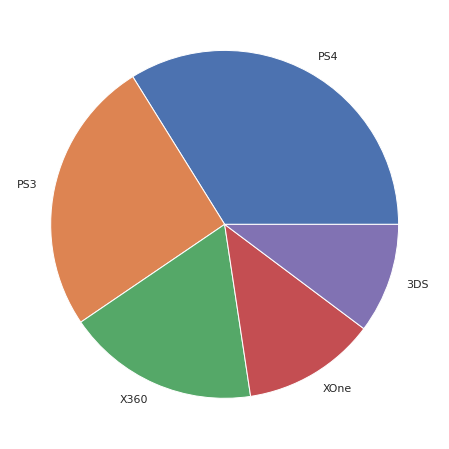

In [40]:
top_platform_eu = (df_new.groupby('platform')['eu_sales'].sum().
             reset_index().
             sort_values('eu_sales', ascending = False, ignore_index = True).
             head(5))

plt.pie(x=top_platform_eu['eu_sales'], labels = top_platform_eu['platform'])
plt.show()

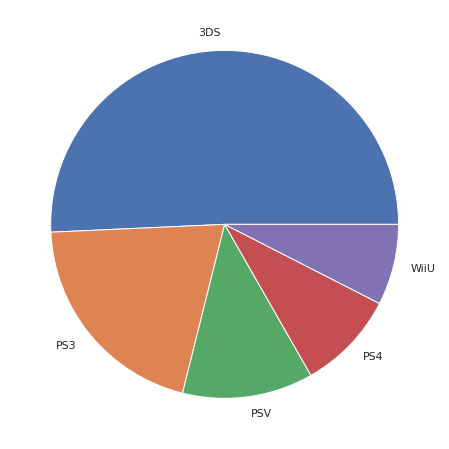

In [41]:
top_platform_jp = (df_new.groupby('platform')['jp_sales'].sum().
             reset_index().
             sort_values('jp_sales', ascending = False, ignore_index = True).
             head(5))

plt.pie(x=top_platform_jp['jp_sales'], labels = top_platform_jp['platform'])
plt.show()

Самая популярная платформа:  
Северная Америка X360 PS4 PS3  
Европа PS4 PS3 X360   
Япония 3DS PS3 PSV  
В целом мы наблюдаем, что для всех 3 регионов платформа ps3 наиболее популярна


### Самые популярные жанры (топ-5)

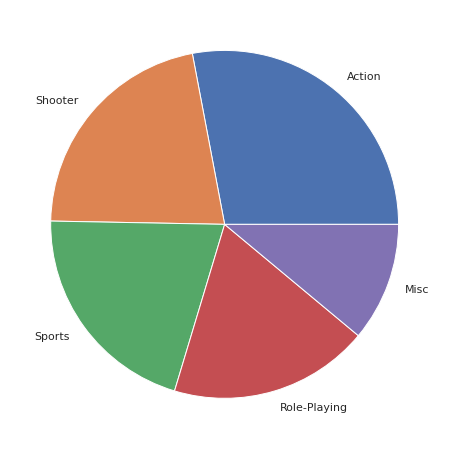

In [42]:
top_genre_na = (df_new.groupby('genre')['na_sales'].sum().
             reset_index().
             sort_values('na_sales', ascending = False, ignore_index = True).
             head(5))

plt.pie(x=top_platform_na['na_sales'], labels = top_genre_na['genre'])
plt.show()

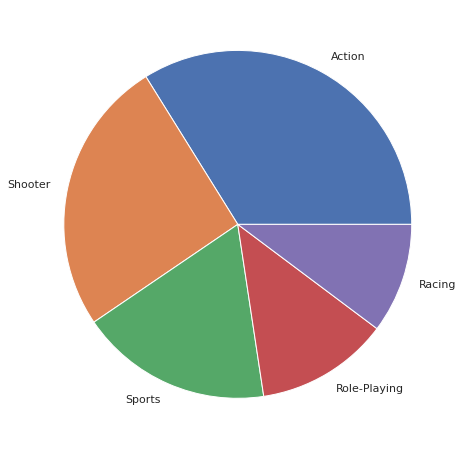

In [43]:
top_genre_eu = (df_new.groupby('genre')['eu_sales'].sum().
             reset_index().
             sort_values('eu_sales', ascending = False, ignore_index = True).
             head(5))

plt.pie(x=top_platform_eu['eu_sales'], labels = top_genre_eu['genre'])
plt.show()

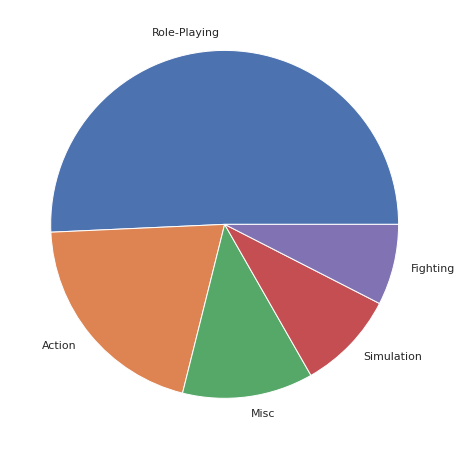

In [44]:
top_genre_jp = (df_new.groupby('genre')['jp_sales'].sum().
             reset_index().
             sort_values('jp_sales', ascending = False, ignore_index = True).
             head(5))

plt.pie(x=top_platform_jp['jp_sales'], labels = top_genre_jp['genre'])
plt.show()

Топ жанры:
Северная Америка action shooter sports  
Европа action shooter sports 
Япония role-playing action misc    
мы видим тут разбег по жанрам в зависимости от географического положения   
В Северной Америке и Европе очень активно играют в игры жанра экшн и стрелялки, тогда как в Японии фаворитом являются ролевые игры    

### Влияние рейтинга на продажи 

In [45]:
df_new.pivot_table(index='year_of_release', columns = 'rating', values = 'na_sales')

rating,E,E10+,M,T,без рейтинга
year_of_release,,,,,
2012.0,0.379785,0.397407,0.514419,0.205443,0.046611
2013.0,0.341084,0.313582,0.661442,0.174839,0.108333
2014.0,0.365909,0.182857,0.425776,0.203671,0.115593
2015.0,0.214023,0.275686,0.441690,0.131226,0.099347
2016.0,0.120758,0.076200,0.200897,0.104070,0.038423


In [46]:
df_new.pivot_table(index='year_of_release', columns = 'rating', values = 'eu_sales')

rating,E,E10+,M,T,без рейтинга
year_of_release,,,,,
2012.0,0.319032,0.234815,0.377054,0.139367,0.042248
2013.0,0.304819,0.246716,0.498846,0.127097,0.087544
2014.0,0.351970,0.174048,0.412931,0.174051,0.098475
2015.0,0.243908,0.151569,0.408451,0.099340,0.097045
2016.0,0.206212,0.076200,0.212051,0.113837,0.033649


In [47]:
df_new.pivot_table(index='year_of_release', columns = 'rating', values = 'jp_sales')

rating,E,E10+,M,T,без рейтинга
year_of_release,,,,,
2012.0,0.141828,0.042593,0.054961,0.068734,0.079832
2013.0,0.074699,0.021343,0.058654,0.093710,0.123465
2014.0,0.055909,0.014167,0.032069,0.089620,0.101737
2015.0,0.048046,0.055294,0.043521,0.051226,0.063814
2016.0,0.016212,0.009000,0.015385,0.026395,0.064505



<font color='DarkBlue'><b>В Северной Америке и европе есть влияние рейтинга на продажи. Тогда как в Японии этого влияния не наблюдается
    </b>

## Проверка гипотез

H0 = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые   
H1 = Средние пользовательские рейтинги платформ Xbox One и PC разные 

In [50]:
results = st.ttest_ind(
    df_new.loc[df_new.platform == 'XOne', 'user_score'],
    df_new.loc[df_new.platform == 'PC', 'user_score'], 
    nan_policy='omit',
    equal_var = False)

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.5489537965134987
Не получилось отвергнуть нулевую гипотезу


HO = Средние пользовательские рейтинги жанров Action и Sports одинаковые   
H1 = Средние пользовательские рейтинги жанров Action и Sports разные   

In [51]:
results = st.ttest_ind(
    df_new.loc[df_new.genre == 'Sports', 'user_score'],
    df_new.loc[df_new.genre == 'Action', 'user_score'], 
    equal_var = False,
nan_policy='omit')

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

4.24307776572644e-20
Отвергаем нулевую гипотезу


In [52]:
df_new.pivot_table(index='genre', values = 'user_score')

,user_score
genre,
Action,6.825048
Adventure,7.466667
Fighting,6.895714
Misc,6.938806
Platform,6.806061
Puzzle,7.633333
Racing,6.151163
Role-Playing,7.258480
Shooter,6.435897


In [53]:
df_new.pivot_table(index='platform', values = 'user_score')

,user_score
platform,
3DS,7.033333
DS,7.000000
PC,6.428641
PS3,6.532862
PS4,6.748249
PSP,5.950000
PSV,7.410000
Wii,6.082353
WiiU,6.904000


Общий вывод: 

Актуальным период был выбран период с 2011 года

PS4 3DS WiiU XOne лидеры по продажам, при этом выросла по продажам только последняя платформа, остальные падают  

Не влияют на продажи:  
пользовательские оценки  

Влияют на продажи:  
оценки критиков  
регион  
жанр игры  

Прогноз на 2017 год:
Прибыльная платформа: X360

Жанр: Action